In [3]:
#this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# enter the foldername in the Shared Google Drive
FOLDERNAME = 'Shared drives/CS 230 Project'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that

# python files from within it.
import sys
sys.path.append('/content/drive/{}'.format(FOLDERNAME))

%cd /content/drive/$FOLDERNAME/

Mounted at /content/drive
/content/drive/Shared drives/CS 230 Project


In [4]:
!pip install sentence-transformers

     |████████████████████████████████| 81kB 4.0MB/s 
     |████████████████████████████████| 2.3MB 9.1MB/s 
     |████████████████████████████████| 1.2MB 32.6MB/s 
     |████████████████████████████████| 901kB 37.4MB/s 
     |████████████████████████████████| 3.3MB 37.5MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.2.0-cp37-none-any.whl size=123339 sha256=9649edd0bf162dbc94b3e1d5ed0814ed7adc7beaf6a96bd2f93dc46e980ce39e
  Stored in directory: /root/.cache/pip/wheels/0f/06/f7/faaa96fdda87462b4fd5c47b343340e9d5531ef70d0eef8242
Successfully built sentence-transformers


In [5]:
from sentence_transformers import SentenceTransformer, models, InputExample, losses, SentencesDataset, util
from torch import nn
from torch.utils.data import DataLoader
import pickle
import numpy as np
import matplotlib.pyplot as plt


In [6]:
def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [7]:
default_embeddings = load_obj("embeddings_3epoch")

In [8]:
len(default_embeddings)

11228

In [9]:
authorToEmbedAndCounter = {} #{author, (embedding, counter)}
not_included = list(range(10))
for author, embedding in default_embeddings: 
    if author not in authorToEmbedAndCounter:
        authorToEmbedAndCounter[author] = [embedding, 1]
    else:
        authorToEmbedAndCounter[author][0] += embedding
        authorToEmbedAndCounter[author][1] += 1

# print(authorToEmbedAndCounter[0])

allAuthors = authorToEmbedAndCounter.keys()

for author in allAuthors:
    authorToEmbedAndCounter[author][0] /= authorToEmbedAndCounter[author][1]

In [10]:
not_included = np.random.choice(list(range(50)), size=20)
not_included = []

In [11]:
authors = ['AaronPressman',
 'AlanCrosby',
 'AlexanderSmith',
 'BenjaminKangLim',
 'BernardHickey',
 'BradDorfman',
 'DarrenSchuettler',
 'DavidLawder',
 'EdnaFernandes',
 'EricAuchard',
 'FumikoFujisaki',
 'GrahamEarnshaw',
 'HeatherScoffield',
 'JaneMacartney',
 'JanLopatka',
 'JimGilchrist',
 'JoeOrtiz',
 'JohnMastrini',
 'JonathanBirt',
 'JoWinterbottom',
 'KarlPenhaul',
 'KeithWeir',
 'KevinDrawbaugh',
 'KevinMorrison',
 'KirstinRidley',
 'KouroshKarimkhany',
 'LydiaZajc',
 "LynneO'Donnell",
 'LynnleyBrowning',
 'MarcelMichelson',
 'MarkBendeich',
 'MartinWolk',
 'MatthewBunce',
 'MichaelConnor',
 'MureDickie',
 'NickLouth',
 'PatriciaCommins',
 'PeterHumphrey',
 'PierreTran',
 'RobinSidel',
 'RogerFillion',
 'SamuelPerry',
 'SarahDavison',
 'ScottHillis',
 'SimonCowell',
 'TanEeLyn',
 'TheresePoletti',
 'TimFarrand',
 'ToddNissen',
 'WilliamKazer']

In [12]:
authorSuccess = {}
for author in authors:
   authorSuccess[author] = (0, 0)

In [13]:
def find_accuracy(threshold):

    correct = 0
    total = 0
    for author, embedding in default_embeddings:
      maximum = -float('inf')
      #second = -float('inf')
      predictedAuthor = -1
      target = author
      if author in not_included:
          target = -1
          
      #secondAuthor = -1
      for auth in allAuthors:
        if auth in not_included:
            continue
        curr = util.pytorch_cos_sim(authorToEmbedAndCounter[auth][0], embedding)
        #curr = 1-np.linalg.norm(authorToEmbedAndCounter[auth][0]-embedding)
        if curr > maximum:
          if auth == predictedAuthor:
              maximum = curr
          else:
              #second = maximum
              #secondAuthor = predictedAuthor
              maximum = curr
              predictedAuthor = auth
        #elif curr > second and auth != predictedAuthor:
          #second = curr
          #secondAuthor = auth 
      if maximum < threshold:
          predictedAuthor = -1
      if predictedAuthor == target: 
        if not target == -1:
           author_name = authors[target]
           current = authorSuccess[author_name]
           authorSuccess[author_name] = (current[0] + 1, current[1])
        correct += 1
      author_name = authors[author]
      current = authorSuccess[author_name]
      authorSuccess[author_name] = (current[0], current[1] + 1)
      total += 1

    print(f"Accuracy for threshold {threshold}: ", correct / total)
    return correct / total







In [14]:
thresholds = np.arange(.5, 1, .01)
accuracies = []
for t in thresholds:
    accuracies.append(find_accuracy(t))

Accuracy for threshold 0.5:  0.6057178482365515
Accuracy for threshold 0.51:  0.6056287851799074
Accuracy for threshold 0.52:  0.6055397221232632
Accuracy for threshold 0.53:  0.6055397221232632
Accuracy for threshold 0.54:  0.6054506590666192
Accuracy for threshold 0.55:  0.6053615960099751
Accuracy for threshold 0.56:  0.6052725329533309
Accuracy for threshold 0.5700000000000001:  0.6051834698966868
Accuracy for threshold 0.5800000000000001:  0.6048272176701104
Accuracy for threshold 0.5900000000000001:  0.6042928393302458
Accuracy for threshold 0.6000000000000001:  0.6038475240470252
Accuracy for threshold 0.6100000000000001:  0.6034022087638048
Accuracy for threshold 0.6200000000000001:  0.6029568934805842
Accuracy for threshold 0.6300000000000001:  0.6019771998574991
Accuracy for threshold 0.6400000000000001:  0.6015318845742786
Accuracy for threshold 0.6500000000000001:  0.6009084431777698
Accuracy for threshold 0.6600000000000001:  0.5997506234413965


KeyboardInterrupt: ignored

In [ ]:
find_accuracy(0)

In [ ]:
for author, success in authorSuccess.items():
   print(author, success[0] / success[1])

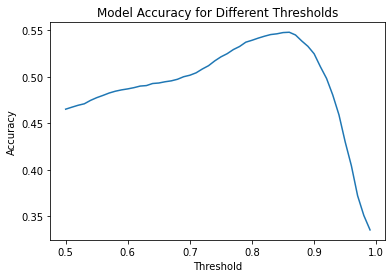

In [28]:
plt.plot(thresholds, accuracies)
plt.title("Model Accuracy for Different Thresholds")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.savefig("thresholds2.png")
#Best is .86 with 54.8%

In [32]:
# embeddings = np.zeros((np.shape(default_embeddings[0][1])[0], len(default_embeddings)))
embeddings = np.zeros((50, np.shape(default_embeddings[0][1])[0]))

In [33]:
for i in range(50):
    embeddings[i, :] = authorToEmbedAndCounter[i][0]

In [20]:
from sklearn.manifold import TSNE

In [35]:
X_embedded = TSNE(n_components=2).fit_transform(embeddings)

In [36]:
np.shape(X_embedded)

(50, 2)

In [37]:
X_embedded

array([[-30.04402  , -82.25811  ],
       [ 75.748535 ,  -7.0450907],
       [-37.80869  ,  -4.716954 ],
       [ 48.489204 ,  80.64339  ],
       [ -1.1199583, -15.369417 ],
       [-16.963572 , -49.534992 ],
       [ 22.37007  , -28.432169 ],
       [ 19.603518 , -63.785416 ],
       [-40.879936 ,  21.482407 ],
       [-40.023457 , -44.66897  ],
       [ 36.19369  ,  33.312466 ],
       [ 28.19672  ,  51.23934  ],
       [ 32.503605 , -16.912098 ],
       [ 79.055466 ,   8.94085  ],
       [ 41.56436  ,  64.79046  ],
       [ -2.1958296,  45.91292  ],
       [-49.402206 ,   8.77824  ],
       [-44.445587 ,  41.144203 ],
       [ 63.57497  ,   3.7640703],
       [-24.28279  ,  26.01808  ],
       [ 52.956997 , -19.750221 ],
       [-67.20667  ,  10.196876 ],
       [-12.1678705, -65.27772  ],
       [ -4.359882 ,  -1.4832462],
       [-59.754818 ,  -7.3730597],
       [-49.747807 , -75.3826   ],
       [ 34.888805 , -37.082306 ],
       [ 30.118217 ,  90.16703  ],
       [ 65.83722  ,

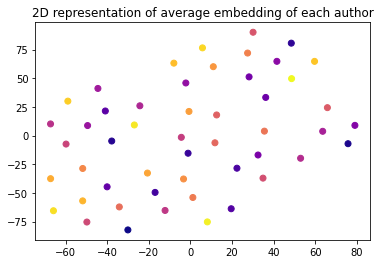

In [46]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=np.arange(50), cmap='plasma')
plt.title("2D representation of average embedding of each author")
plt.savefig("2D_embeddings.png")

In [15]:
indices = [0, 4, 10, 14, 20, 24, 30, 34, 39, 45]
#indices = list(range(50))


In [16]:
clusters = np.zeros((1, np.shape(default_embeddings[0][1])[0]))

In [17]:
for index in indices:
    cluster = np.zeros((100, np.shape(default_embeddings[0][1])[0]))
    count = 0
    for i, embedding in default_embeddings:
        if count == 100:
            break
        if i == index:
            cluster[count, :] = embedding
            count += 1  
    clusters = np.concatenate((clusters, cluster), axis=0)
    
clusters = clusters[1:,:] 
clusters


array([[-0.04324973, -0.1345136 , -0.66718119, ...,  0.7990455 ,
         0.13412076, -0.36903223],
       [-1.01340139, -0.33837569, -0.41306368, ...,  0.05406493,
         0.27109584, -0.57786697],
       [-0.00177732, -0.44421542, -1.08117616, ...,  0.52727699,
        -0.04546776, -0.19881749],
       ...,
       [-0.10113914, -0.45889518,  0.97895181, ...,  1.17600393,
         0.45505929,  0.4817639 ],
       [-0.20265174, -0.50170636,  0.73845422, ...,  0.94266295,
         0.73056865,  0.86252093],
       [-0.09437586, -0.49074775,  0.5792191 , ...,  0.6865176 ,
         0.73768812,  1.01628172]])

In [21]:
clusters_embedded = TSNE(n_components=2).fit_transform(clusters)

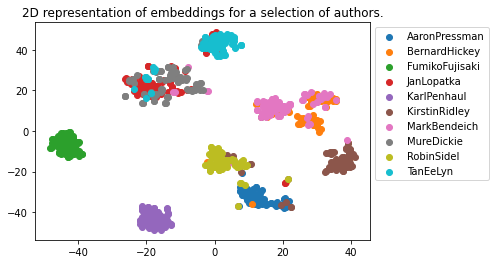

In [23]:
for i in range(len(indices)):
   plt.scatter(clusters_embedded[i * 100:(i + 1) * 100:,0], clusters_embedded[i * 100:(i + 1) * 100:,1], label=authors[indices[i]])
plt.title("2D representation of embeddings for a selection of authors.")
lgd = plt.legend(bbox_to_anchor=(1, 1))

plt.savefig("author_embeddings_9.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

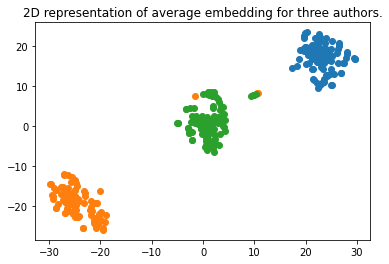

In [47]:
"""
Karl Penhaul: 95%
Fumiko Fujisaki: 97%

Mure Dickie: 35%
Jan Lopatka: 27%

TanEelyn: 19%

"""